In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('AAPL.csv')



In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [29]:
df = df.sort_values(by='Date').reset_index(drop=True)


In [30]:
df.shape

(2011, 7)

In [31]:
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [32]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [33]:
 df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [35]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,2016-01-01 03:10:28.344107520,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
min,2012-01-03 00:00:00,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,2014-01-02 12:00:00,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,2015-12-31 00:00:00,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,2017-12-28 12:00:00,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,2019-12-30 00:00:00,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08
std,NaN,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07


In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [37]:
df['Price_Change'] = df['Close'] - df['Open']
df['Daily_Return'] = df['Close'].pct_change() * 100
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [38]:
df = df.dropna()


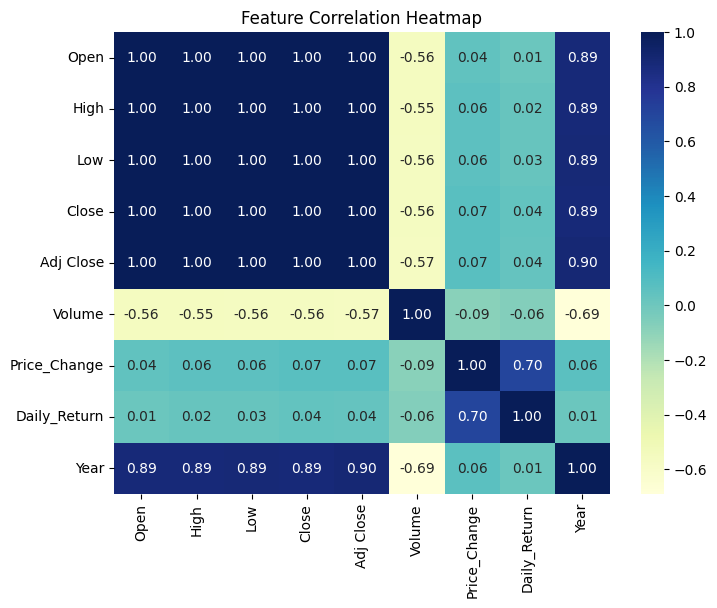

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

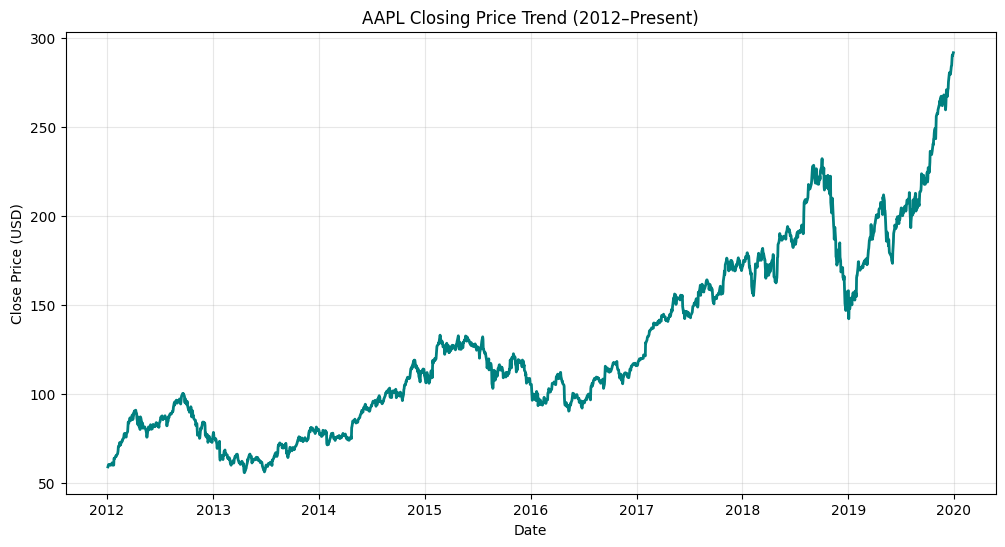

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color='teal', linewidth=2)
plt.title("AAPL Closing Price Trend (2012–Present)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(alpha=0.3)
plt.show()

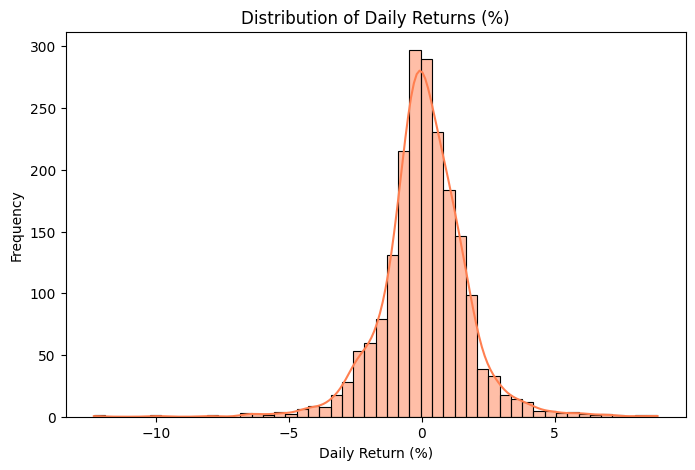

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='coral')
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()


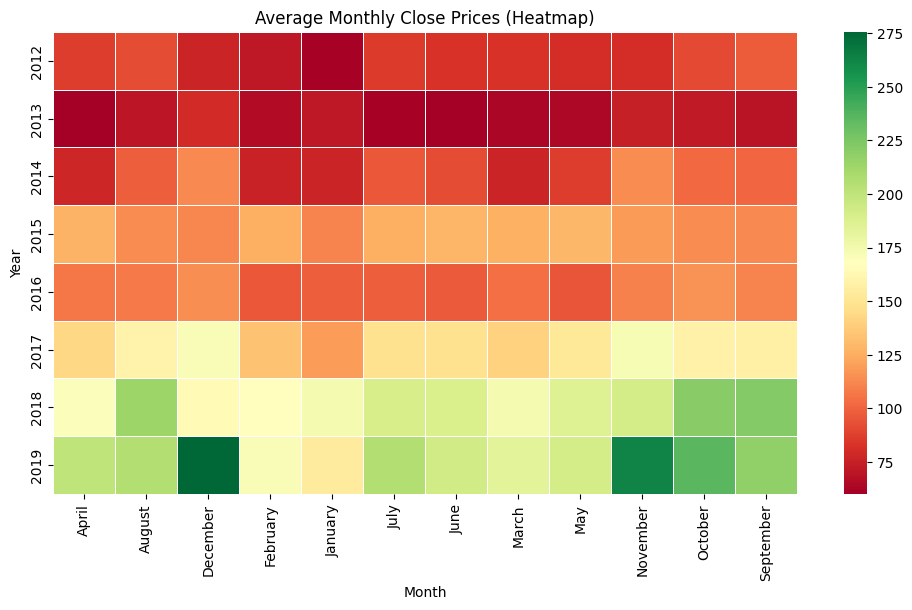

In [42]:
monthly_avg = df.groupby(['Year','Month'])['Close'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_avg, cmap='RdYlGn', linewidths=0.5)
plt.title("Average Monthly Close Prices (Heatmap)")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

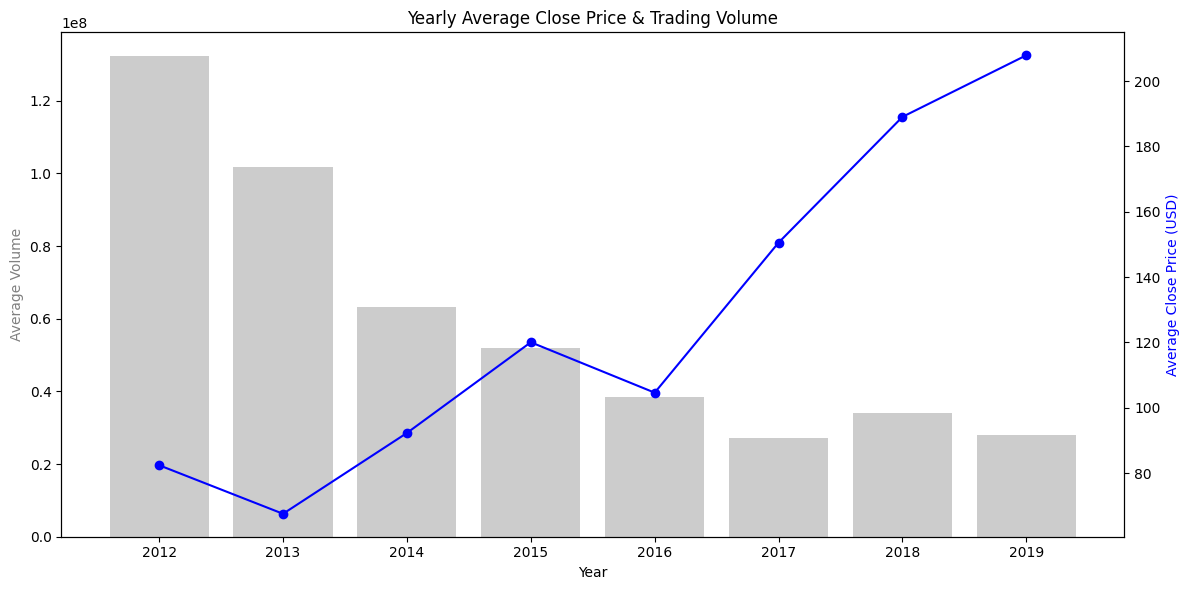

In [43]:
yearly = df.groupby('Year')[['Close','Volume']].mean()
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.bar(yearly.index, yearly['Volume'], alpha=0.4, color='gray', label='Avg Volume')
ax2.plot(yearly.index, yearly['Close'], color='blue', marker='o', label='Avg Close Price')
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Volume", color='gray')
ax2.set_ylabel("Average Close Price (USD)", color='blue')
plt.title("Yearly Average Close Price & Trading Volume")
fig.tight_layout()
plt.show()

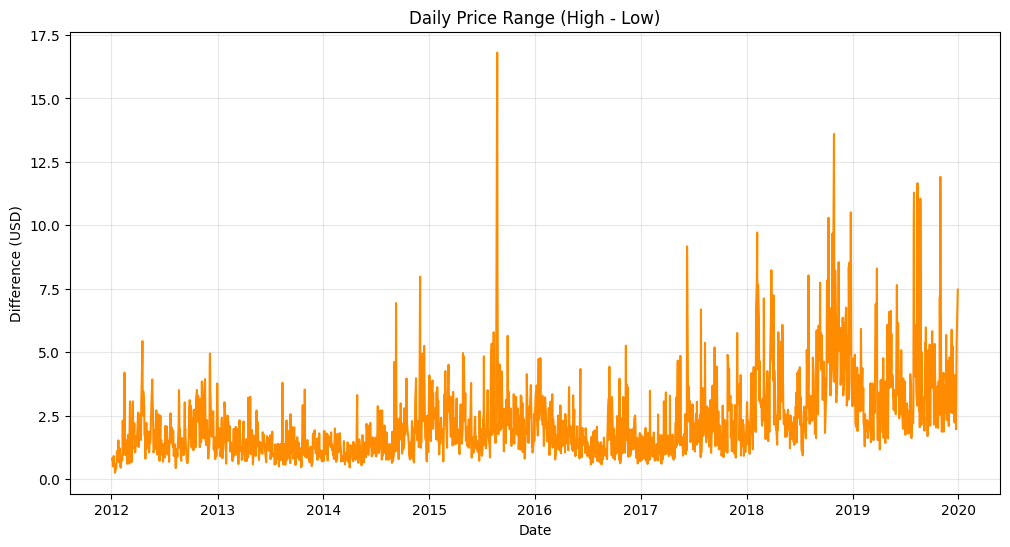

In [44]:
df['HL_Diff'] = df['High'] - df['Low']
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['HL_Diff'], color='darkorange')
plt.title("Daily Price Range (High - Low)")
plt.xlabel("Date")
plt.ylabel("Difference (USD)")
plt.grid(alpha=0.3)
plt.show()

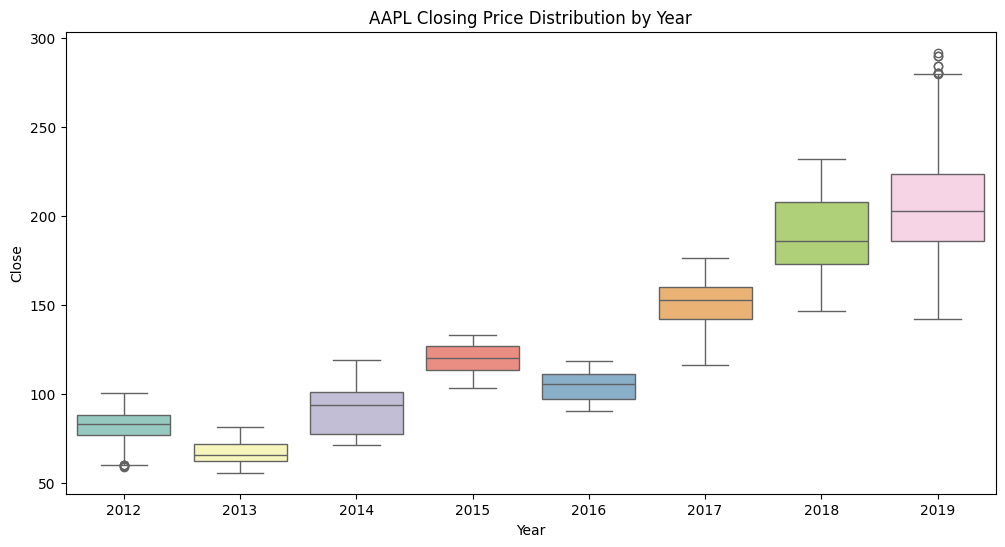

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Close', data=df, palette='Set3')
plt.title("AAPL Closing Price Distribution by Year")
plt.show()

In [46]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['STD_30'] = df['Close'].rolling(window=30).std()

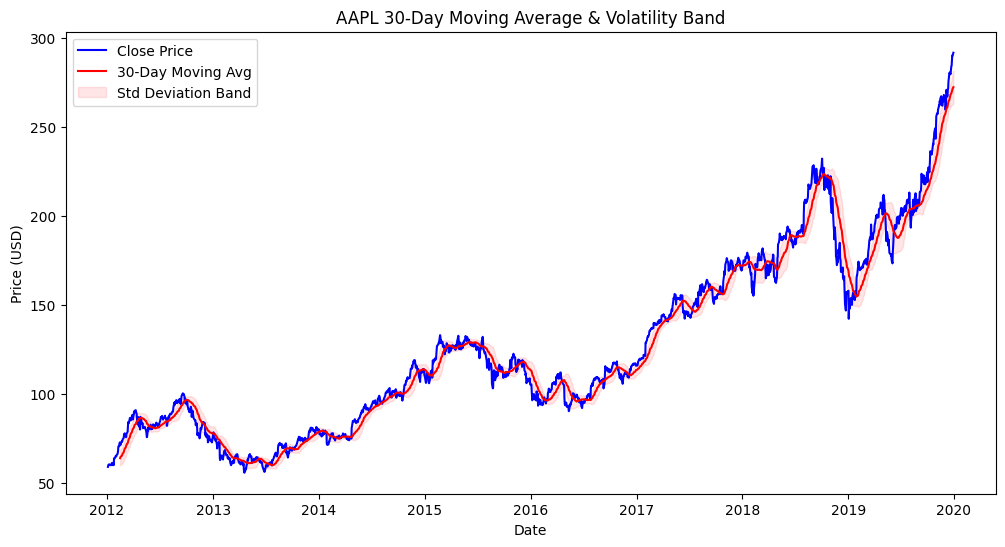

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_30'], label='30-Day Moving Avg', color='red')
plt.fill_between(df['Date'], df['MA_30']-df['STD_30'], df['MA_30']+df['STD_30'],
                 color='red', alpha=0.1, label='Std Deviation Band')
plt.title("AAPL 30-Day Moving Average & Volatility Band")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [51]:
print('Key Insights:')
print(f'Highest Close Price: {df['Close'].max():.2f}$')
print(f'Lowest Close Price: {df['Close'].min():.2f}$')
print(f'Average Daily Return: {df['Daily_Return'].mean():.2f}%')
print(f'Highest Volume Day: {df.loc[df['Volume'].idxmax(), 'Date'].date()}')
print(f'Highest Price Range Day: {df.loc[df['HL_Diff'].idxmax(), 'Date'].date()}')

Key Insights:
Highest Close Price: 291.52$
Lowest Close Price: 55.79$
Average Daily Return: 0.09%
Highest Volume Day: 2012-02-15
Highest Price Range Day: 2015-08-24
